In [1]:
import pandas as pd
import pandas.rpy.common as com
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import brewer2mpl
from IPython.display import FileLink
import seaborn as sns
%matplotlib inline

/opt/anaconda/lib/python2.7/site-packages/pandas/rpy/__init__.py:8: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2, found here: http://rpy.sourceforge.net
  "like rpy2, found here: http://rpy.sourceforge.net", FutureWarning)


###This is the file from the [Sparsity Notebook](./Sparsity_make_l2fc_table.ipynb).

In [2]:
df_all = pd.read_csv("data/l2fc_table.csv")

In [3]:
print(df_all)

      sparsity_threshold  Day Treatment       OTU  log2FoldChange         p  \
0                   0.55   30    13CCSS   OTU.783       -0.337083  0.996574   
1                   0.55   30    13CCSS    OTU.79        0.759818  0.488986   
2                   0.55   30    13CCSS   OTU.304        0.418365  0.808984   
3                   0.55   30    13CCSS    OTU.50        0.728969  0.525237   
4                   0.55   30    13CCSS   OTU.382        2.983357  0.000000   
5                   0.55   30    13CCSS   OTU.465        0.551599  0.688754   
6                   0.55   30    13CCSS   OTU.162        0.211671  0.920419   
7                   0.55   30    13CCSS  OTU.1084        1.189434  0.136626   
8                   0.55   30    13CCSS   OTU.525        1.902067  0.002101   
9                   0.55   30    13CCSS   OTU.985        1.194349  0.135894   
10                  0.55   30    13CCSS   OTU.587       -0.146184  0.986588   
11                  0.55   30    13CCSS   OTU.342   

In [4]:
df_pivot = df_all.pivot_table(index="OTU", columns=["Treatment","Day"], values="log2FoldChange")

OTU_series = df_all.groupby("OTU").first()["Rank2"]
df_pivot = df_pivot.join(OTU_series)

phyla = df_all.sort("log2FoldChange").groupby("Rank2").last()
phyla.sort("log2FoldChange", ascending=False, inplace=True)

xd = dict([(p, x + 1) for x, p in enumerate(phyla.index.tolist())])
xmax = np.max(xd.values()) + 1
X = []
for p in df_pivot.Rank2:
    try:
        X.append(xd[p])
    except KeyError:
        X.append(xmax)
df_pivot["X"] = X

m1 = brewer2mpl.get_map("Paired", "qualitative", 9)
m2 = brewer2mpl.get_map("Dark2", "qualitative", 8)
colors = m1.hex_colors + m2.hex_colors
cd = dict(zip(phyla.index.tolist(), colors))
phylum_color = []
for p in df_pivot.Rank2:
    try:
        phylum_color.append(cd[p])
    except KeyError:
        phylum_color.append("#151515")
df_pivot["phylum_color"] = phylum_color
df_pivot

,"(13CCPS, 30)","(13CCSS, 30)",Rank2,X,phylum_color
OTU,,,,,
OTU.1,-1.330105,-0.985248,Actinobacteria,10,#1B9E77
OTU.10,-0.802412,-0.911840,Proteobacteria,2,#1F78B4
OTU.100,1.471091,1.503862,Proteobacteria,2,#1F78B4
OTU.1001,-0.078289,NaN,Planctomycetes,5,#FB9A99
OTU.1005,0.125570,0.287432,Chloroflexi,4,#33A02C
OTU.1006,NaN,0.045910,Planctomycetes,5,#FB9A99
OTU.101,-0.099885,-0.464152,Proteobacteria,2,#1F78B4
OTU.1010,NaN,0.372830,Proteobacteria,2,#1F78B4
OTU.1016,0.004130,0.161503,Proteobacteria,2,#1F78B4


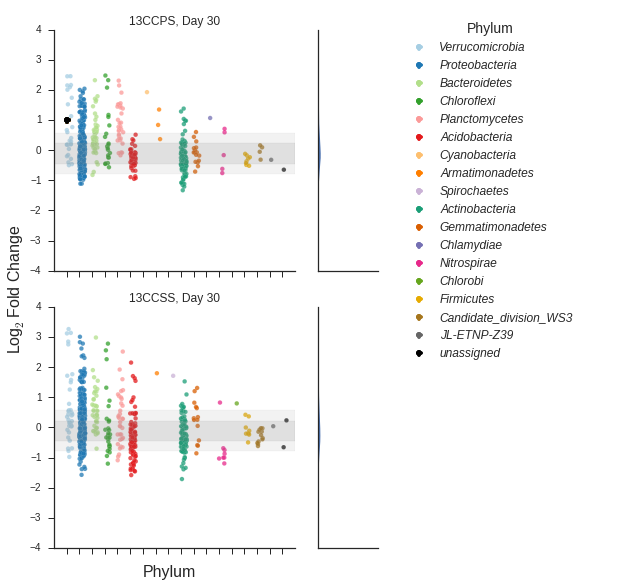

In [17]:
df = df_pivot

thresh = df_all["log2FoldChange"].iloc[0]

mean_fc = df_all["log2FoldChange"].mean()

fig = plt.figure()
fig.set_size_inches(5,8)

gs = gridspec.GridSpec(nrows = 2, ncols = 2, width_ratios=[1,0.25], 
                       left=0.05, right=0.95, bottom=0.05, top=0.95,
                       hspace=0.15, wspace=0.15)


N = len(phyla.index) + 1
treatment = ["13CCPS", "13CCSS"]
days = [30]
ncol = 2
nrow = 2
for j, d in zip(range(ncol), days):
    for i, t in zip(range(nrow), treatment):
        try:
            with sns.axes_style("ticks"):
                ax = fig.add_subplot(gs[i,j]) 
                ax.axhspan(-thresh - mean_fc, thresh - mean_fc, facecolor='0.5', alpha=0.15)
                ax.axhspan(2*-thresh - mean_fc, 2*thresh - mean_fc, facecolor='0.5', alpha=0.10)
                points = ax.scatter(df.X + 0.45 * np.random.random(len(df.X)),
                                df[(t,d)], 
                                alpha = 0.75, 
                                c = df.phylum_color.tolist(), 
                                s = 20, 
                                linewidth=0.10, 
                                edgecolor = "#ffffff")
                #ax.axhline(thresh, color = "#151515")
                ax.set_title("%s, Day %s"%(t, d))
                sns.despine(ax=ax, offset=0)
        except KeyError:
            ax.set_visible(False)
            continue

axs = fig.get_axes()
xmin = np.array([axi.get_xlim()[0] for axi in axs]).min()
xmax = np.array([axi.get_xlim()[1] for axi in axs]).max()            

with sns.axes_style("white"):
    axHistX = fig.add_subplot(gs[0, 1])

    sns.kdeplot(df_all[df_all["Treatment"]=="13CCPS"]["log2FoldChange"].values, 
                ax=axHistX, 
                vertical = True, 
                shade = True)
    sns.despine(ax = axHistX, trim = False)
        
    #axHistX.axhline(thresh, color = "#151515")

    axHistY = fig.add_subplot(gs[1, 1])
    
    sns.kdeplot(df_all[df_all["Treatment"]=="13CCSS"]["log2FoldChange"].values, 
                ax=axHistY, 
                vertical = True, 
                shade = True)
    
    sns.despine(ax = axHistY, trim = False)

    #axHistY.axhline(thresh, color = "#151515")

axs = fig.get_axes()
xmin = np.array([axi.get_xlim()[0] for axi in axs]).min()
xmax = np.array([axi.get_xlim()[1] for axi in axs]).max()
ymin = np.array([axi.get_ylim()[0] for axi in axs]).min()
ymax = np.array([axi.get_ylim()[1] for axi in axs]).max()

for i, axi in enumerate(axs):
    if i == 10:
        axi.set_xticklabels([])
        axi.set_ylim([ymin,ymax])
        continue
    elif i == 11:
        axi.set_xticklabels([])
        axi.set_ylim([ymin,ymax])
        axi.set_xticklabels([])
        #xi.set_xlabel("kernel density")
        continue
    axi.set_ylim([ymin,ymax])
    #axi.set_xticks(range(len(phyla.index.tolist()) + 1))\
    axi.set_xticks(np.arange(N) + 1)
    axi.set_xticklabels([])
    axi.set_xlim([0, N+1])
    
for axi in axs[2:]:
    axi.set_yticklabels([])

#axs[-1].set_xticklabels(axs[-1].get_xticks(), rotation = -90, size = 8)
axs[-1].set_xlim(axs[-2].get_xlim())

fig.text(-0.08, 0.5, r"Log$_{2}$ Fold Change", rotation="vertical", va ="center", fontsize=16)
fig.text(0.30, 0, "Phylum", fontsize=16)

dummy_lines = []
for p in phyla.index.tolist():
    l, = axs[0].plot([1],[1], "o", color = cd[p], label = p)
    dummy_lines.append(l)

l, = axs[0].plot([1],[1], "o", color = "k", label = "unassigned")
dummy_lines.append(l)

leg = fig.legend(dummy_lines, phyla.index.tolist() + ["unassigned"], "upper left", ncol=1, numpoints=1, 
           bbox_to_anchor=(1.10, 1.00), frameon = False, prop = {"size":12, "style":"italic"})

for axi in axs:
    axi.set_ylim([-4,4])

leg.set_title("Phylum")
leg.get_title().set_fontsize('14')